**Series de Fourier**

In [53]:
import numpy as np
import matplotlib.pylab as plt

from scipy import signal as sp
# Importamos todo el modulo sympy
from sympy import *
# Importamos las variables simbolicas 'n' y 't'
from sympy.abc import n, t

Text(0.5, 0, 'time(t)')

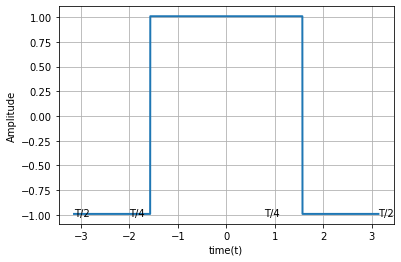

In [54]:
# Periodo
T = 2*pi
# Frecuencia angular
w = (2*pi)/T

amplitude = 1
time = np.arange(-np.pi, np.pi, 0.001)
squareWaveFunction = (sp.square(time + 1.57 )*amplitude) + amplitude/100 #Onda cuadrara
# Graficamos la onda cuadrada
plt.plot(time, squareWaveFunction, lw=2)
plt.grid()
plt.annotate('T/2', xy = (np.pi, -1), xytext = (np.pi, -1.01))
plt.annotate('T/2', xy = (-np.pi, -1), xytext = (-np.pi, -1.01))
plt.annotate('T/4', xy = (np.pi /4, -1), xytext = (np.pi /4, -1.01))
plt.annotate('T/4', xy = (-np.pi /4, -1), xytext = (-2, -1.01))

plt.ylabel('Amplitude')
plt.xlabel('time(t)')

# **Calculo de coeficientes**

In [57]:
ao = (2/T)*(integrate(-1, (t, -T/2, -T/4)) + integrate(1, (t, -T/4, T/4)) + integrate(-1, (t, T/4, T/2)))
print("a0 = ")
pprint(ao)
print('\n')

# Integramos la funcion (2/T)*cos(nt)
an = (2/T)*(integrate(-cos(n*w*t), (t, -T/2, -T/4)) + integrate(cos(n*w*t), (t, -T/4, T/4)) + integrate(-cos(n*w*t), (t, T/4, T/2)))

print("an = ")
pprint(an)

# Integramos la funcion (2/pi)*sin(nt) 
bn = (2/T)*(integrate(-sin(n*w*t), (t, -T/2, -T/4)) + integrate(sin(n*w*t), (t, -T/4, T/4)) + integrate(-sin(n*w*t), (t, T/4, T/2)))

print("bn = ")
pprint(bn)

a0 = 
0


an = 
                                              ⎛⎧   ⎛π⋅n⎞                      
⎛⎧     ⎛π⋅n⎞                            ⎞     ⎜⎪sin⎜───⎟                      
⎜⎪2⋅sin⎜───⎟                            ⎟     ⎜⎪   ⎝ 2 ⎠   sin(π⋅n)           
⎜⎪     ⎝ 2 ⎠                            ⎟     ⎜⎪──────── - ────────  for n > -
⎜⎨──────────  for n > -∞ ∧ n < ∞ ∧ n ≠ 0⎟ + 2⋅⎜⎨   n          n               
⎜⎪    n                                 ⎟     ⎜⎪                              
⎜⎪                                      ⎟     ⎜⎪        -π                    
⎝⎩    π               otherwise         ⎠     ⎜⎪        ───                  o
                                              ⎝⎩         2                    
──────────────────────────────────────────────────────────────────────────────
                                               π                              

                 ⎞
                 ⎟
                 ⎟
∞ ∧ n < ∞ ∧ n ≠ 0⎟
                 ⎟
                 ⎟


# **Declaración número de términos de la serie**

In [60]:
print( "f(x) = ")

nCoeficientes = 16 
#16 coeficientes para obtener 8 series
serie = (ao)/2
for i in range(1, nCoeficientes + 1):
    serie = serie + (an*cos(n*w*t)).subs(n, i)
for j in range(1, nCoeficientes + 1):
    serie = serie + (bn*sin(n*w*t)).subs(n, j)

pprint(serie)

f(x) = 
4⋅cos(t)   4⋅cos(3⋅t)   4⋅cos(5⋅t)   4⋅cos(7⋅t)   4⋅cos(9⋅t)   4⋅cos(11⋅t)   4
──────── - ────────── + ────────── - ────────── + ────────── - ─────────── + ─
   π          3⋅π          5⋅π          7⋅π          9⋅π           11⋅π       

⋅cos(13⋅t)   4⋅cos(15⋅t)
────────── - ───────────
   13⋅π          15⋅π   


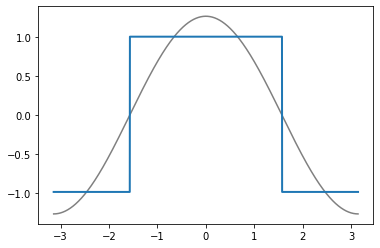

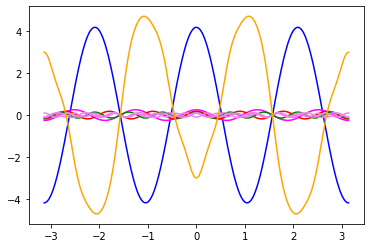

In [61]:
serie1 = (4 * np.cos(time)) / np.pi
plt.plot(time, serie1, 'grey', label = '(4 *cos(time)) /pi)')
plt.plot(time, squareWaveFunction, lw=2)
plt.show()

serie2 = ((4 * np.cos(time*3)) / 3*np.pi)
plt.plot(time, serie2, 'blue', label = '(4 *cos(3*time)) / 3*pi)')

serie3 = (4 * np.cos(5*time)) / (5*np.pi)
plt.plot(time, serie3, 'magenta', label = '(4 *cos(5*time)) / (5*pi)')

serie4 = (4* np.cos(7*time)) / (7*np.pi)
plt.plot(time, serie4, 'red', label = '(4*cos(7*time)) / (7*pi)')

serie5= (4 * np.cos(9*time)) / (9*np.pi)
plt.plot(time, serie5, 'green', label = '(4 *cos(9*time)) / (9*pi)')

serie6 = (4 * np.cos(11*time)) / (11*np.pi)
plt.plot(time, serie6, 'violet', label = '(4 *cos(11*time)) / (11*pi)')

serie7 = (-4 * np.cos(13*time)) / (13*np.pi)
plt.plot(time, serie7, 'violet', label = '(4 *cos(13*time)) / (13*pi)')

serie8 = (4 * np.cos(15*time)) / (15*np.pi)
plt.plot(time, serie8, 'violet', label = '(4 *cos(15*time)) / (15*pi)')


serieFourier = serie1 - serie2 + serie3 - serie4 + serie5 - serie6 + serie7 - serie8
plt.plot(time, serieFourier, 'orange')
plt.show()

# **Gráficas de la serie de Fourier**

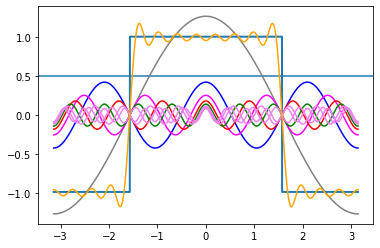

In [62]:
plt.axhline(y = 0.5, label = '1/2')

serie1 = (4 * np.cos(time)) / np.pi
plt.plot(time, serie1, 'grey', label = '(4 *cos(time)) /pi)')
plt.plot(time, squareWaveFunction, lw=2)


serie2 = (4 * np.cos(time*3)) / (3*np.pi)
plt.plot(time, serie2, 'blue', label = '(4 *cos(time*3)) / 3*pi)')

serie3 = (4 * np.cos(5*time)) / (5*np.pi)
plt.plot(time, serie3, 'magenta', label = '(4 *cos(5*time)) / (5*pi)')

serie4 = (4* np.cos(7*time)) / (7*np.pi)
plt.plot(time, serie4, 'red', label = '(4*cos(7*time)) / (7*pi)')

serie5= (4 * np.cos(9*time)) / (9*np.pi)
plt.plot(time, serie5, 'green', label = '(4 *cos(9*time)) / (9*pi)')

serie6 = (4 * np.cos(11*time)) / (11*np.pi)
plt.plot(time, serie6, 'violet', label = '(4 *cos(11*time)) / (11*pi)')

serie7 = (4 * np.cos(13*time)) / (13*np.pi)
plt.plot(time, serie7, 'violet', label = '(4 *cos(13*time)) / (13*pi)')

serie8 = (4 * np.cos(15*time)) / (15*np.pi)
plt.plot(time, serie8, 'violet', label = '(4 *cos(15*time)) / (15*pi)')


serieFourier = serie1 - serie2 + serie3 - serie4 + serie5 - serie6 + serie7 - serie8

plt.plot(time, serieFourier, 'orange')

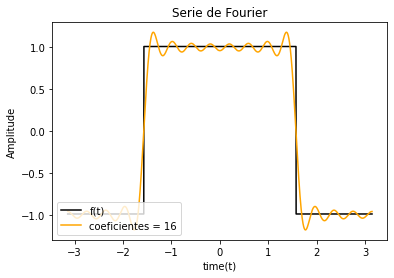

In [ ]:
plt.plot(time, squareWaveFunction, 'black', label = 'f(t)')
etiqueta = 'coeficientes = '+ str(nCoeficientes)
serieFourier = serie1 - serie2 + serie3 - serie4 + serie5 - serie6 + serie7 - serie8
plt.plot(time, serieFourier, 'orange', label = etiqueta)
plt.title('Serie de Fourier')
plt.xlabel('time(t)')
plt.ylabel('Amplitude')
plt.legend(loc = "lower left")